# ML Engineering Basics

## Introduction

In this notebook you will go through the process of environment setup and try packages mentioned in the theory part of the module.

> We assume that you created fresh environment and installed notebook package on top of it or use Google Colab.

## Conda environment

At this point you already have a working environment since you've opened this notebook. The only packaged installed is **notebook** which is a part of jupyter ecosystem. Let's proceed with installation of other packages.

## Using shell commands from the notebook

First let's install numpy via pip. We can do it as easy as:

```bash
pip install numpy
```

To run this and any other shell commands use ! symbol before the command itself.

In [1]:
!pip install numpy

To install pandas we are going to use conda instead. Look at command below:
- You must use `-y` parameter when running `conda install` inside the notebook. Conda will prompt you to agree to installation. If you provide `-y` parameter, this will be omitted.
- We also use `-c conda-forge` to install from specific conda channel. The channel is just a place where conda packages are stored. Many packages are not available in the official channels, however they are most likely available in the conda-forge. Note, that pandas is available in official channel, but we use conda-forge just to get in touch.
- The numbers after the package name is the version of the package which is going to be installed. Here we have pandas version 1.0.5.

In [2]:
!conda install -y -c conda-forge pandas==1.0.5 

Solving environment: ...working... done

# All requested packages already installed.



## Numpy, vectorization

Numpy is a rich and powerful library. The ideas behind it are optimized operations with matrices (or tensors when there are more than 2 dimentions). It is written in C, thus providing much better peformance than pure Python. Same (or similar) interface is used in the most popular deep learning libraries like TensorFlow and PyTorch.

The core principle of Numpy is vectorization. Instead of calculating matrix operations in for cycle one number by one, Numpy parallelize this operations obtaining much better performance.

Let's see it for ourselves. First we create a 200x200 matrix with integers ranging from 0 to 100. Then measure the time of matrix multiplication in two cases:
- Matrix as list of list in pure Python
- Matrix as optimized numpy array.

In [3]:
import numpy as np

mtx = np.random.randint(0, 100, size=(200, 200))

In [4]:
print(f'Shape: {mtx.shape}')
mtx

Shape: (200, 200)


array([[24, 70,  8, ..., 31, 10,  4],
       [99, 99, 80, ..., 46, 12, 59],
       [99, 37, 96, ..., 55, 67,  3],
       ...,
       [49, 14, 97, ...,  9, 18, 63],
       [65, 22, 24, ...,  1, 79, 74],
       [44, 50, 41, ...,  3, 18, 79]])

In [5]:
mtx_as_list = mtx.tolist()

In [6]:
%%time
result = np.zeros_like(mtx).tolist()
for i in range(len(mtx_as_list)):
    for j in range(len(mtx_as_list)):
        for k in range(len(mtx_as_list)):
             result[i][j] += mtx_as_list[i][k] * mtx_as_list[k][j]

Wall time: 3.17 s


In [7]:
%%time
# @ - matrix multiplication operation in Numpy
numpy_result = mtx @ mtx

Wall time: 13 ms


`Broadcasting` describes how numpy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes.

**Broadcasting rules**:
When operating on two arrays, NumPy compares their shapes element-wise. 
It starts with the trailing (i.e. rightmost) dimensions and works its way left. 

Two dimensions are compatible when

- they are equal, or
- one of them is 1

Example:

A      (4d array):  8 x 1 x 6 x 1

B      (3d array):      7 x 1 x 5

Result (4d array):  8 x 7 x 6 x 5

In [41]:
# Mismatching dimensions
x = np.arange(4)
z = x.reshape(4,1)
y = np.ones(5)

print('Shapes of x and y:', x.shape,y.shape)
x + y

TypeError: ones() missing 1 required positional argument: 'shape'

In [9]:
print('Shapes of z and y:', z.shape, y.shape)
print('Shapes of z + y:', (z + y).shape)

z+y

Shapes of z and y: (4, 1) (5,)
Shapes of z + y: (4, 5)


array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.]])

In [10]:
z, y

(array([[0],
        [1],
        [2],
        [3]]),
 array([1., 1., 1., 1., 1.]))

As you can see matrix operation in Numpy are very optimized. Many other libraries, like Pandas, build their operations on top of Numpy.

## Pandas

Now let's look at Pandas. It's like a swiss army knife for data wrangling and analysis. We'll go through indexing, column creation, data saving and loading, and custom functions. There is much more inside the library, but this you  should learn for yourself.

In [11]:
!pip install bds_courseware

In [12]:
import pandas as pd

from bds_courseware import read_drive_dataset
from bds_courseware import WORKSHOP_DATASETS, HOMEWORK_DATASETS

name = "msft_store"
read_drive_dataset(*WORKSHOP_DATASETS[name])

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free
...,...,...,...,...,...,...
5317,JS King,1.0,720,Developer Tools,19-07-2018,₹ 269.00
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,₹ 64.00
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,₹ 269.00
5320,Simply Text,4.0,386,Developer Tools,23-01-2014,₹ 219.00


In [13]:
WORKSHOP_DATASETS, HOMEWORK_DATASETS

({'msft_store': ('15mCEE_6GfUXBMLh58zhOYBp6Gfti7TOq', 'csv'),
  'sweets': ('1rD-yCS4CJ2qkeBgL-f3ilahatb8pZq2G', 'csv')},
 {'suicide_rates': ('1fhUu_t9C7yqVuMXeqjadFFzEzAdfwgiT', 'csv'),
  'car_perfs': ('1WCNKNxbTyR0DkE4wk9fKl7C9tVaTA7Al', 'tsv'),
  'brain': ('1tpZxfubFR0QT-pvLEjs34_A77VR7uIhC', 'tsv'),
  'bank': ('1mCPUi9nHDHAfHGYf0oi-tnhbkCGTb_Mg', 'ssv'),
  'air_quality': ('1Cf1oA7L9UM2B7HemJ9gFbr9IAgHquyfT', 'ssv'),
  'hypothyroid': ('1m53GMGvefv99ZeTOuhjb5wLkTSwfMTCf', 'csv'),
  'movies': ('1ZyCVwksXfp03H4X8wOye6vRD3B3O2YFl', 'csv'),
  'day': ('1KWMuDmPznwEF5317-yhCdYxjnxFWeFbq', 'csv'),
  'hour': ('1p4azCzZlFR5KZNVa4bG-LrZZtx0lPds1', 'csv'),
  'duq': ('1NTkHmJ5BAgXEMqYok4dLD7FwLGv3bpDK', 'csv.zip'),
  'stock': ('14m4swWIB6hEq7U71YJhaF5-T6mxt9obW', 'csv')})

Frequently data is stored as a plain text in a comma separated format. It is plain, human-readable format.

Pandas parser support many options to read such files. When reading csv file with known structure it is best to parse every column on reading step (e.g. timestamps). See documentation of `pandas.read_csv` for all options.

In [14]:
df = read_drive_dataset(*WORKSHOP_DATASETS[name])

In [15]:
df.head(10)

,Name,Rating,No of people Rated,Category,Date,Price
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free
1,"Chemistry, Organic Chemistry and Biochemistry-...",3.0,627,Books,08-01-2014,Free
2,BookViewer,3.5,593,Books,29-02-2016,Free
3,Brick Instructions,3.5,684,Books,30-01-2018,Free
4,Introduction to Python Programming by GoLearni...,2.0,634,Books,30-01-2018,Free
5,Gurbani Reader,4.5,399,Books,18-01-2017,Free
6,NFO Viewer,4.5,566,Books,13-11-2012,Free
7,Text to Speech TTS,3.0,175,Books,17-10-2013,Free
8,ACK Comics,4.0,460,Books,20-12-2012,Free
9,Learn Biology and Human Body Anatomy by GoLear...,3.5,363,Books,25-11-2013,Free


In [43]:
df.to_csv('data.csv', index=False)
df

,Name,Rating,No of people Rated,Category,Date,Price,rating_power,Price Num
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free,938.0,0.0
1,"Chemistry, Organic Chemistry and Biochemistry-simpleNeasyApp by WAGmob",3.0,627,Books,08-01-2014,Free,1881.0,0.0
2,BookViewer,3.5,593,Books,29-02-2016,Free,2075.5,0.0
3,Brick Instructions,3.5,684,Books,30-01-2018,Free,2394.0,0.0
4,Introduction to Python Programming by GoLearningBus,2.0,634,Books,30-01-2018,Free,1268.0,0.0
...,...,...,...,...,...,...,...,...
5317,JS King,1.0,720,Developer Tools,19-07-2018,₹ 269.00,720.0,269.0
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,₹ 64.00,1250.0,64.0
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,₹ 269.00,3448.0,269.0
5320,Simply Text,4.0,386,Developer Tools,23-01-2014,₹ 219.00,1544.0,219.0


In [44]:
pd.read_csv('data.csv')

,Name,Rating,No of people Rated,Category,Date,Price,rating_power,Price Num
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free,938.0,0.0
1,"Chemistry, Organic Chemistry and Biochemistry-simpleNeasyApp by WAGmob",3.0,627,Books,08-01-2014,Free,1881.0,0.0
2,BookViewer,3.5,593,Books,29-02-2016,Free,2075.5,0.0
3,Brick Instructions,3.5,684,Books,30-01-2018,Free,2394.0,0.0
4,Introduction to Python Programming by GoLearningBus,2.0,634,Books,30-01-2018,Free,1268.0,0.0
...,...,...,...,...,...,...,...,...
5317,JS King,1.0,720,Developer Tools,19-07-2018,₹ 269.00,720.0,269.0
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,₹ 64.00,1250.0,64.0
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,₹ 269.00,3448.0,269.0
5320,Simply Text,4.0,386,Developer Tools,23-01-2014,₹ 219.00,1544.0,219.0


You can reffer to a columns by name like a dictionary or an attribute. The returned object is a **pandas.Series**. You can treat it like a data vector.

In [45]:
df["Name"]
# or
df.Name

0                                                               Dynamic Reader
1       Chemistry, Organic Chemistry and Biochemistry-simpleNeasyApp by WAGmob
2                                                                   BookViewer
3                                                           Brick Instructions
4                          Introduction to Python Programming by GoLearningBus
                                         ...                                  
5317                                                                   JS King
5318                                                               MQTTSniffer
5319                                             Dev Utils - JSON, CSV and XML
5320                                                               Simply Text
5321                                                                       NaN
Name: Name, Length: 5322, dtype: object

In [19]:
# Pay attention to the reserved method names
df['sum'] = 1
print(df.sum)
df.drop(columns='sum', inplace=True)

<bound method DataFrame.sum of                                                    Name  Rating  \
0                                        Dynamic Reader     3.5   
1     Chemistry, Organic Chemistry and Biochemistry-...     3.0   
2                                            BookViewer     3.5   
3                                    Brick Instructions     3.5   
4     Introduction to Python Programming by GoLearni...     2.0   
...                                                 ...     ...   
5317                                            JS King     1.0   
5318                                        MQTTSniffer     2.5   
5319                      Dev Utils - JSON, CSV and XML     4.0   
5320                                        Simply Text     4.0   
5321                                                NaN     NaN   

      No of people Rated         Category        Date     Price  sum  
0                    268            Books  07-01-2014      Free    1  
1                    6

You can see that some names are truncated. When working with text data it is useful to remove truncation with the next line of code

In [20]:
pd.options.display.max_colwidth = None

**Series** support common math and bool opperations.

In [21]:
df["Rating"] < 2

0       False
1       False
2       False
3       False
4       False
        ...  
5317     True
5318    False
5319    False
5320    False
5321    False
Name: Rating, Length: 5322, dtype: bool

In [22]:
df["Rating"] * 10

0       35.0
1       30.0
2       35.0
3       35.0
4       20.0
        ... 
5317    10.0
5318    25.0
5319    40.0
5320    40.0
5321     NaN
Name: Rating, Length: 5322, dtype: float64

Another useful function is `value_counts()`. Use it to calculate frequencies of each unique values in a **Series**.

In [23]:
df["Rating"].value_counts()

4.0    1299
5.0     968
4.5     900
3.5     844
3.0     615
2.5     276
1.0     201
2.0     156
1.5      62
Name: Rating, dtype: int64

In [24]:
# Calculate percentage of each rating number instead of absolute value
###
df["Rating"].value_counts(normalize=True)
###

4.0    0.244127
5.0    0.181921
4.5    0.169141
3.5    0.158617
3.0    0.115580
2.5    0.051870
1.0    0.037775
2.0    0.029318
1.5    0.011652
Name: Rating, dtype: float64

You can create new or update existing column using simple assignment. Another way is to use `.assign()` function. Assign is very useful it pair with long chained expressions.

In [25]:
df['rating_power']  = df["Rating"] * df["No of people Rated"]
# or
df  = df.assign(rating_power=lambda this_df: this_df["Rating"] * this_df["No of people Rated"])
df.head()

,Name,Rating,No of people Rated,Category,Date,Price,rating_power
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free,938.0
1,"Chemistry, Organic Chemistry and Biochemistry-simpleNeasyApp by WAGmob",3.0,627,Books,08-01-2014,Free,1881.0
2,BookViewer,3.5,593,Books,29-02-2016,Free,2075.5
3,Brick Instructions,3.5,684,Books,30-01-2018,Free,2394.0
4,Introduction to Python Programming by GoLearningBus,2.0,634,Books,30-01-2018,Free,1268.0


There are common chart implemented in Pandas. You can access them using `.plot.`. You can use it with a Dataframe or a Series. To draw we need to install matlplotlib library first.

In [46]:
!pip install matplotlib

<AxesSubplot:ylabel='Frequency'>

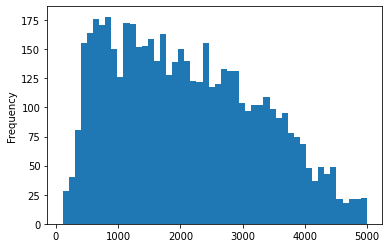

In [47]:
df.rating_power.plot.hist(bins=50)

If you need to know what unique labels are in the column, you can use `.unique()`

In [48]:
df['Category'].unique()

array(['Books', 'Business', 'Developer Tools', 'Social',
       'Food and Dining', 'Government and Politics', 'Health and Fitness',
       'Kids and Family', 'Lifestyle', 'Multimedia Design', 'Music',
       'Navigation and Maps', 'News and Weather', nan], dtype=object)

One of the most frequent operations in Pandas is filtering. You can do it using boolean indexing or `.query()` function.

In [29]:
df.loc[df['Category'] == 'Music']

,Name,Rating,No of people Rated,Category,Date,Price,rating_power
3773,Spotify Music,4.0,895,Music,26-05-2017,Free,3580.0
3774,iTunes,3.0,735,Music,26-04-2018,Free,2205.0
3775,Gaana,3.5,732,Music,24-05-2012,Free,2562.0
3776,Amazon Music,3.5,533,Music,13-02-2018,Free,1865.5
3777,JioSaavn Music & Radio,4.0,219,Music,27-08-2015,Free,876.0
...,...,...,...,...,...,...,...
4521,cnblue lyrics,5.0,668,Music,24-04-2017,Free,3340.0
4522,Radio Sudan – Radio Sudan FM & AM: Listen Live Sudanese Radio Stations Online + Music and Talk Stations,2.0,667,Music,06-11-2019,Free,1334.0
4523,BitSynth,4.5,938,Music,13-02-2012,Free,4221.0
4524,StreamToApp Universal,2.0,296,Music,20-07-2015,Free,592.0


In [30]:
df.loc[df['Category'] == 'Music'].sort_values('rating_power', ascending=False)

,Name,Rating,No of people Rated,Category,Date,Price,rating_power
3851,MP3 Volume Booster,5.0,982,Music,25-02-2020,Free,4910.0
4054,Free Piano - MS Store Port,5.0,964,Music,09-10-2019,Free,4820.0
3866,fre:ac - free audio converter,5.0,953,Music,14-04-2020,Free,4765.0
4434,Radio Cuba – Radio Cuba FM & AM: Listen Live Cuban Radio Stations Online + Music and Talk Stations,5.0,952,Music,05-11-2019,Free,4760.0
4205,Animal Ringtones,5.0,943,Music,18-07-2017,Free,4715.0
...,...,...,...,...,...,...,...
4415,Japanese Radio Channel,1.5,177,Music,24-08-2016,Free,265.5
4003,Binaural Magic Music Streaming,1.5,132,Music,11-07-2018,Free,198.0
4444,Rennie Foster - Heart Shaped Shadow,1.0,176,Music,15-08-2013,Free,176.0
4074,Transpose FREE,1.0,163,Music,01-02-2017,Free,163.0


In [31]:
df.query('Category == "Music"')

,Name,Rating,No of people Rated,Category,Date,Price,rating_power
3773,Spotify Music,4.0,895,Music,26-05-2017,Free,3580.0
3774,iTunes,3.0,735,Music,26-04-2018,Free,2205.0
3775,Gaana,3.5,732,Music,24-05-2012,Free,2562.0
3776,Amazon Music,3.5,533,Music,13-02-2018,Free,1865.5
3777,JioSaavn Music & Radio,4.0,219,Music,27-08-2015,Free,876.0
...,...,...,...,...,...,...,...
4521,cnblue lyrics,5.0,668,Music,24-04-2017,Free,3340.0
4522,Radio Sudan – Radio Sudan FM & AM: Listen Live Sudanese Radio Stations Online + Music and Talk Stations,2.0,667,Music,06-11-2019,Free,1334.0
4523,BitSynth,4.5,938,Music,13-02-2012,Free,4221.0
4524,StreamToApp Universal,2.0,296,Music,20-07-2015,Free,592.0


In [32]:
# Find Lifestyle apps with the best rating
###
df[(df.Category == 'Lifestyle') & (df.Rating == 5)]
###

,Name,Rating,No of people Rated,Category,Date,Price,rating_power
3166,Islam 360 (Universal),5.0,901,Lifestyle,29-06-2015,Free,4505.0
3173,Mahadev,5.0,673,Lifestyle,18-02-2015,Free,3365.0
3186,Psychology Facts,5.0,942,Lifestyle,11-11-2018,Free,4710.0
3210,Horoscope & Astrology,5.0,110,Lifestyle,02-12-2018,Free,550.0
3221,Dictate&Translate,5.0,367,Lifestyle,24-01-2020,Free,1835.0
...,...,...,...,...,...,...,...
3632,Shalom Reflections,5.0,918,Lifestyle,02-04-2013,Free,4590.0
3637,sammler:modelcar,5.0,836,Lifestyle,21-03-2014,Free,4180.0
3639,Dimmitt Automotive Group,5.0,435,Lifestyle,05-08-2014,Free,2175.0
3642,Carp-Talk,5.0,865,Lifestyle,26-06-2014,Free,4325.0


In [33]:
df[(df.Category == 'Lifestyle') & (df.Rating == df.Rating.max())]


,Name,Rating,No of people Rated,Category,Date,Price,rating_power
3166,Islam 360 (Universal),5.0,901,Lifestyle,29-06-2015,Free,4505.0
3173,Mahadev,5.0,673,Lifestyle,18-02-2015,Free,3365.0
3186,Psychology Facts,5.0,942,Lifestyle,11-11-2018,Free,4710.0
3210,Horoscope & Astrology,5.0,110,Lifestyle,02-12-2018,Free,550.0
3221,Dictate&Translate,5.0,367,Lifestyle,24-01-2020,Free,1835.0
...,...,...,...,...,...,...,...
3632,Shalom Reflections,5.0,918,Lifestyle,02-04-2013,Free,4590.0
3637,sammler:modelcar,5.0,836,Lifestyle,21-03-2014,Free,4180.0
3639,Dimmitt Automotive Group,5.0,435,Lifestyle,05-08-2014,Free,2175.0
3642,Carp-Talk,5.0,865,Lifestyle,26-06-2014,Free,4325.0


In [34]:
# Find all apps from `Health and Fitness` category which more than 600 people rated
###
df[(df.Category == 'Health and Fitness') & (df['No of people Rated'] > 600)]
###

,Name,Rating,No of people Rated,Category,Date,Price,rating_power
2292,Fitbit,3.5,622,Health and Fitness,07-12-2012,Free,2177.0
2295,Fitbit Coach,4.0,717,Health and Fitness,30-08-2017,Free,2868.0
2296,Full Body Workouts,4.0,848,Health and Fitness,21-04-2016,Free,3392.0
2298,Home Fitness,4.0,990,Health and Fitness,20-03-2014,Free,3960.0
2302,3D Bones and Organs (Anatomy),4.0,902,Health and Fitness,10-07-2015,Free,3608.0
...,...,...,...,...,...,...,...
2810,Thuoc Viet,3.5,692,Health and Fitness,02-05-2013,Free,2422.0
2812,BMI Calculator RT,4.0,850,Health and Fitness,26-12-2012,Free,3400.0
2815,BMICalculatorFree,1.5,882,Health and Fitness,13-12-2013,Free,1323.0
2816,Lazy Eye Math,3.5,750,Health and Fitness,09-02-2015,Free,2625.0


Another common use case is applying cusom function via `.apply()`. You can apply any function to dataframe row- or column-wise.

In [35]:
# create a boolean column with non-free apps indicator
df.apply(lambda this_df: this_df.Price != 'Free', axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
5317     True
5318     True
5319     True
5320     True
5321     True
Length: 5322, dtype: bool

In [36]:
df['Price']

0           Free
1           Free
2           Free
3           Free
4           Free
          ...   
5317    ₹ 269.00
5318     ₹ 64.00
5319    ₹ 269.00
5320    ₹ 219.00
5321         NaN
Name: Price, Length: 5322, dtype: object

In [37]:
def price_to_num(p):
    """
    Function to convert price columns to float values.
    In case of free app set price to zero.
    Leave NaNs as is.
    """
    if p == 'Free':
        return 0
    elif pd.isna(p):
        return p
    return float(p[2:].replace(',',''))
df['Price Num'] = df['Price'].apply(price_to_num)

pandas provides various facilities for easily combining together Series or DataFrame with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

In [49]:
# Create a dataframe with ratings and claims
unique_ratings = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
claims = ['very bad', 'bad', 'bad', 'poor', 'moderate', 'good', 'good', 'very good', 'very good']

ratings = pd.DataFrame(
    {
    'Rating': unique_ratings,
    'Claim': claims
    }
)
ratings

,Rating,Claim
0,1.0,very bad
1,1.5,bad
2,2.0,bad
3,2.5,poor
4,3.0,moderate
5,3.5,good
6,4.0,good
7,4.5,very good
8,5.0,very good


In [59]:
# Merge initial df to obtain claim information
pd.merge(
    df, ratings, 
    on='Rating', 
    how='left'
)

,Name,Rating,No of people Rated,Category,Date,Price,rating_power,Price Num,Claim
0,Dynamic Reader,3.5,268,Books,07-01-2014,Free,938.0,0.0,good
1,"Chemistry, Organic Chemistry and Biochemistry-simpleNeasyApp by WAGmob",3.0,627,Books,08-01-2014,Free,1881.0,0.0,moderate
2,BookViewer,3.5,593,Books,29-02-2016,Free,2075.5,0.0,good
3,Brick Instructions,3.5,684,Books,30-01-2018,Free,2394.0,0.0,good
4,Introduction to Python Programming by GoLearningBus,2.0,634,Books,30-01-2018,Free,1268.0,0.0,bad
...,...,...,...,...,...,...,...,...,...
5317,JS King,1.0,720,Developer Tools,19-07-2018,₹ 269.00,720.0,269.0,very bad
5318,MQTTSniffer,2.5,500,Developer Tools,10-04-2017,₹ 64.00,1250.0,64.0,poor
5319,"Dev Utils - JSON, CSV and XML",4.0,862,Developer Tools,18-11-2019,₹ 269.00,3448.0,269.0,good
5320,Simply Text,4.0,386,Developer Tools,23-01-2014,₹ 219.00,1544.0,219.0,good


pandas also allows to process data divided into groups using `groupy` statement

In [40]:
df.groupby(['Category']).agg(['mean', 'max', 'min'])

Rating           No of people Rated             \
                             mean  max  min               mean   max  min   
Category                                                                    
Books                    3.791372  5.0  1.0         548.545969  1000  100   
Business                 3.602356  5.0  1.0         549.459499   999  100   
Developer Tools          3.886000  5.0  1.0         545.356000   999  100   
Food and Dining          3.789157  5.0  1.0         550.891566   994  102   
Government and Politics  4.050000  5.0  1.0         548.271429   984  115   
Health and Fitness       3.785579  5.0  1.0         558.506641   998  105   
Kids and Family          3.947826  5.0  1.0         553.136232   997  103   
Lifestyle                3.850610  5.0  1.0         554.928862  1000  100   
Multimedia Design        3.551282  5.0  1.0         595.538462   993  110   
Music                    3.759628  5.0  1.0         539.104914  1000  102   
Navigation and Maps      3.801948  5.0  1.0         551.032468   986  108   
News and Weather         3.837474  5.0  1.0         549.453416   998  100   
Social                   3.847561  5.0  1.0         575.158537  1000  111   

                        rating_power                 Price Num               
                                mean     max    min       mean     max  min  
Category                                                                     
Books                    2091.871287  4990.0  159.0  23.845827  2599.0  0.0  
Business                 1978.148748  4920.0  130.0  27.763181  1624.0  0.0  
Developer Tools          2111.503000  4945.0  118.0  45.772000  5449.0  0.0  
Food and Dining          2077.198795  4900.0  242.0   0.000000     0.0  0.0  
Government and Politics  2250.721429  4875.0  115.0   0.000000     0.0  0.0  
Health and Fitness       2100.012334  4965.0  178.0   0.000000     0.0  0.0  
Kids and Family          2190.501449  4880.0  108.0   0.000000     0.0  0.0  
Lifestyle                2155.627033  4990.0  133.0   0.000000     0.0  0.0  
Multimedia Design        2149.482906  4835.0  282.5   0.000000     0.0  0.0  
Music                    2033.223772  4910.0  129.0   0.000000     0.0  0.0  
Navigation and Maps      2092.801948  4930.0  108.0   0.000000     0.0  0.0  
News and Weather         2108.721532  4820.0  211.0   0.000000     0.0  0.0  
Social                   2214.419207  4995.0  140.0   0.000000     0.0  0.0

That's it for now. Pandas has user guide with best practices for all functionality. Find it [here](https://pandas.pydata.org/docs/user_guide/index.html). Pandas is one of the vitals for data scientist, spending more time to learn it is highly recommended.

In [68]:
df.groupby(["Name"]).agg("mean")

,Rating,No of people Rated,rating_power,Price Num
Name,,,,
#1 Weather,3.5,681.0,2383.5,0.0
#BABYLON'13,3.5,966.0,3381.0,0.0
#Code,4.0,855.0,3420.0,0.0
#UWP,4.0,537.0,2148.0,0.0
#Yatzy,4.0,302.0,1208.0,0.0
...,...,...,...,...
追书悦读,3.5,864.0,3024.0,0.0
道学经典(有声),5.0,813.0,4065.0,0.0
降水にゃうきゃすと,4.5,543.0,2443.5,0.0
